___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 23486 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model.***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Leraning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting, Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [3]:
strategy = tf.distribute.TPUStrategy(resolver)

In [4]:
!pip install termcolor

In [5]:
!pip install colorama

In [6]:
# 1-Import Libraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno

from sklearn.compose import make_column_transformer


# Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored
import ipywidgets
from ipywidgets import interact

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

In [7]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                                                                                                                                                                               Review Text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  
0        Intimate  Intimates  
1         Dresses    Dresses  
2         Dresses    Dresses  
3         Bottoms      Pants  
4            Tops    Blouses

### Data Wrangling

Data wrangling typically involves pre-processing steps such as data collection, cleaning, and organizing. The goal during this process is to transform the data into a usable and meaningful form for subsequent stages.

In [ ]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 23486
Number of columns: 11


In [ ]:
duplicate_rows = df.duplicated()
num_duplicates = df.duplicated().sum()
print(f"Total number of duplicate rows: {num_duplicates}")

Total number of duplicate rows: 0


In [ ]:
unique_values_in_dataframe = df.apply(lambda x: x.nunique())

# Display unique values in the entire DataFrame
print("Unique valus in the entire DataFrame:")
print(unique_values_in_dataframe)

Unique valus in the entire DataFrame:
Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64


In [ ]:
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [9]:
#Remove the column name "Unnamed" beacuse it has no significance in the analysis of the data.
df.drop('Unnamed: 0', axis=1, inplace=True)
#Remove the “Title” beacusemost of the rows contains null value and it has no significance to the data analysis process.
df.drop('Title', axis=1, inplace=True)

In [ ]:
df.shape

(23486, 9)

In [ ]:
object_column = df.describe(include=object).T
print("Summary statistics for object columns:")
print(object_column)

Summary statistics for object columns:
                 count unique  \
Review Text      22641  22634   
Division Name    23472      3   
Department Name  23472      6   
Class Name       23472     20   

                                                                                                top  \
Review Text      Perfect fit and i've gotten so many compliments. i buy all my suits from here now!   
Division Name                                                                               General   
Department Name                                                                                Tops   
Class Name                                                                                  Dresses   

                  freq  
Review Text          3  
Division Name    13850  
Department Name  10468  
Class Name        6319  


<Axes: >

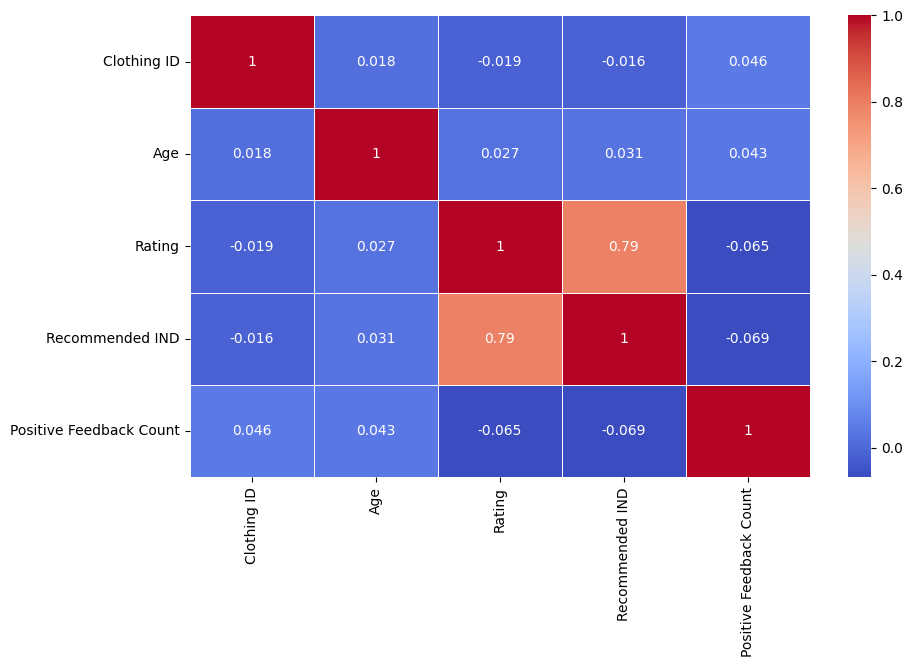

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)

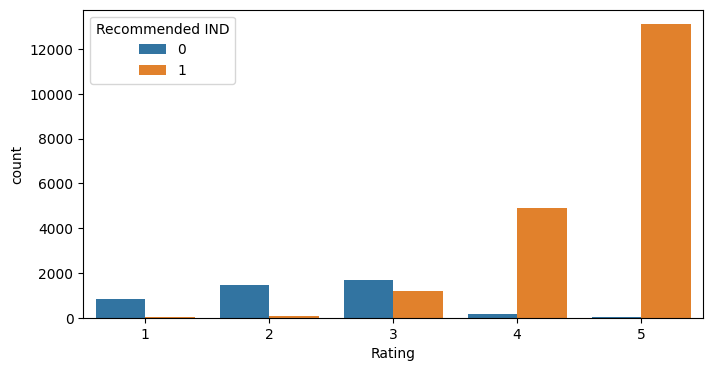

In [ ]:
#result_crosstab=pd.crosstab(df['Rating'], df['Recommended IND'])
#plt.figure(figsize=(8, 6))
#sns.heatmap(result_crosstab, annot=True, cmap='viridis', fmt='g')
#plt.title('Rating vs Recommended')
#plt.show()

plt.figure(figsize = (8,4))
ax = sns.countplot(x="Rating",  data=df,  hue = "Recommended IND")

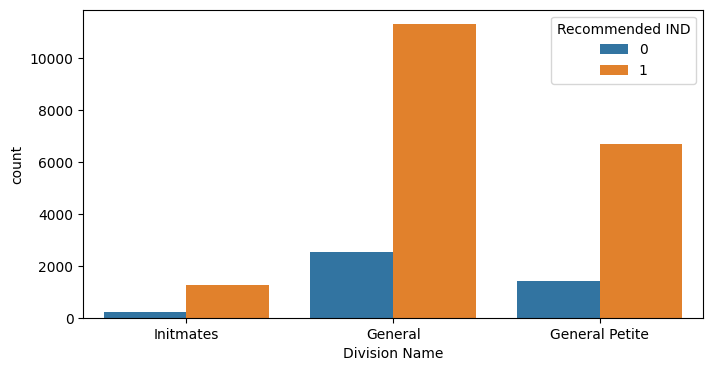

In [ ]:
#df1 = df.rename(columns={'Recommended IND': 'Recommended','Division Name':'Division'})

plt.figure(figsize = (8,4))
ax = sns.countplot(x="Division Name",  data=df,  hue = "Recommended IND")

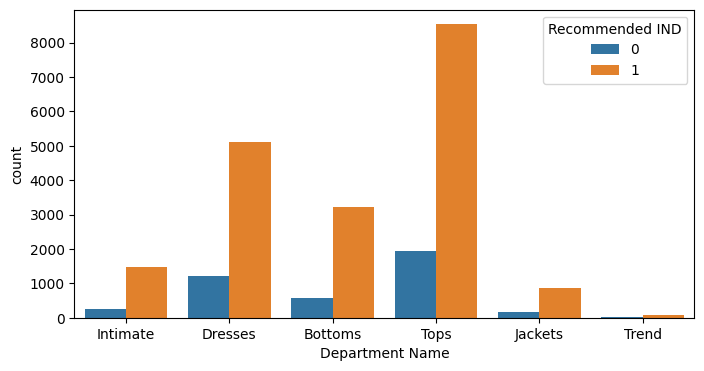

In [ ]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x="Department Name",  data=df,  hue = "Recommended IND")

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [10]:
df = df.rename(columns={'Recommended IND': 'Recommended'})
print(df.Recommended.value_counts())

1    19314
0     4172
Name: Recommended, dtype: int64


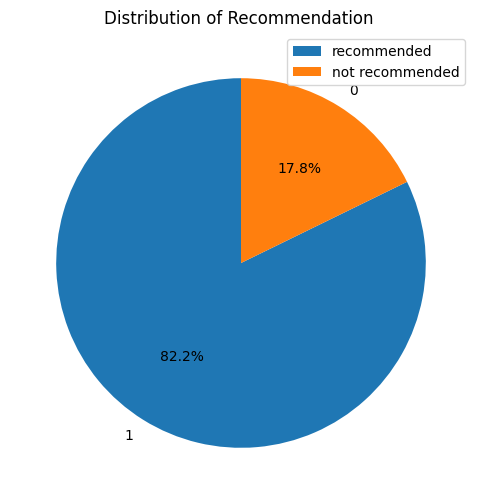

In [ ]:
# Count the occurrences
Recommended_counts = df['Recommended'].value_counts()

# Create a pie chart
plt.pie(Recommended_counts, labels=Recommended_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Recommendation ')
plt.legend(labels=['recommended','not recommended'])
plt.show()

 The target class variable is imbalanced


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [11]:
df.rename(columns={"Review Text":"text", "Recommended":"label"},
          inplace=True)

In [12]:
df_ml = df[['text', 'label']].copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22641 non-null  object
 1   label   23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [ ]:
df_ml.columns

Index(['text', 'label'], dtype='object')

In [ ]:
df_ml.head()

text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   label  
0      1  
1      1  
2      0  
3      1  
4      1

---
---


### Missing Value Detection

In [ ]:
df_ml.isnull().sum()

text     845
label      0
dtype: int64

In [13]:
df_ml.dropna(inplace = True)
df_ml.reset_index(drop=True,inplace=True)

In [ ]:
df_ml.isnull().sum()

text     0
label    0
dtype: int64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [14]:
stop_words = stopwords.words('english')
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    #joining
    return " ".join(text_cleaned)


In [15]:
df_ml["text"] = df_ml["text"].apply(cleaning)

In [ ]:
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

In [16]:
#separate the texts by a space, and then split the resulting string into a list of individual words.
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

identify the frequency of words and potentially identify common words in the dataset.

In [17]:
common_words = pd.Series(" ".join(df_ml["text"]).split()).value_counts()
common_words

dress        11352
fit          10128
size          9363
love          8992
top           8281
             ...  
particle         1
deposited        1
sof              1
nerdy            1
platinum         1
Length: 11996, dtype: int64

In [18]:
uncommon_words = common_words[common_words <= 1]

By filtering for words with a frequency of one , I can identify words that are relatively rare in the text .This can be useful for Reducing Dimensionality,Improving Model Generalization and focusing on Important Terms.


In [19]:
uncommon_words.index

Index(['wench', 'orangeish', 'slightl', 'seasonally', 'healthy', 'hangy',
       'shaper', 'squarple', 'bursting', 'wheelchair',
       ...
       'mosly', 'retailerday', 'encouraging', 'hahahaha', 'gasped', 'particle',
       'deposited', 'sof', 'nerdy', 'platinum'],
      dtype='object', length=5033)

In [20]:
# remove words identified as "uncommon_words"(occurring one times) from each text entry in the "text" column
df_ml["text"] = df_ml["text"].apply(lambda x: " ".join([i for i in x.split() if i not in uncommon_words.index]))
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

### Collect Words (positive and negative separately)

In [21]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [22]:
positive_words =" ".join(df_ml[df_ml["label"] == 1].text).split()

In [23]:
negitive_words =" ".join(df_ml[df_ml["label"] == 0].text).split()

In [24]:
text_r = df_ml["text"]
joined_words = " ".join(text_r)

In [ ]:
joined_words

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening skirt would take away embellishment garment love color idea style work returned dress basket hte last see woul

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [25]:
from wordcloud import WordCloud

In [26]:
wordcloud_positive = WordCloud(background_color="white",
                               max_words =250,
                               scale=3)

In [27]:
wordcloud_positive.generate(str(positive_words))

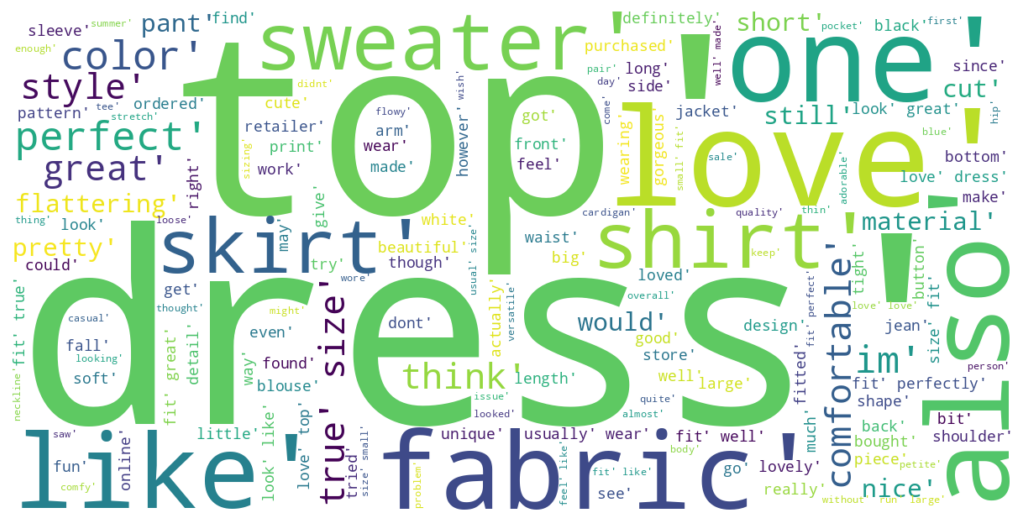

In [ ]:
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive,
           interpolation="bilinear")
plt.axis("off")
plt.show()

In [28]:
wordcloud_negative = WordCloud(background_color="white",
                               max_words=250,
                               colormap='gist_heat',
                               scale=3)

In [29]:
wordcloud_negative.generate(str(negitive_words))

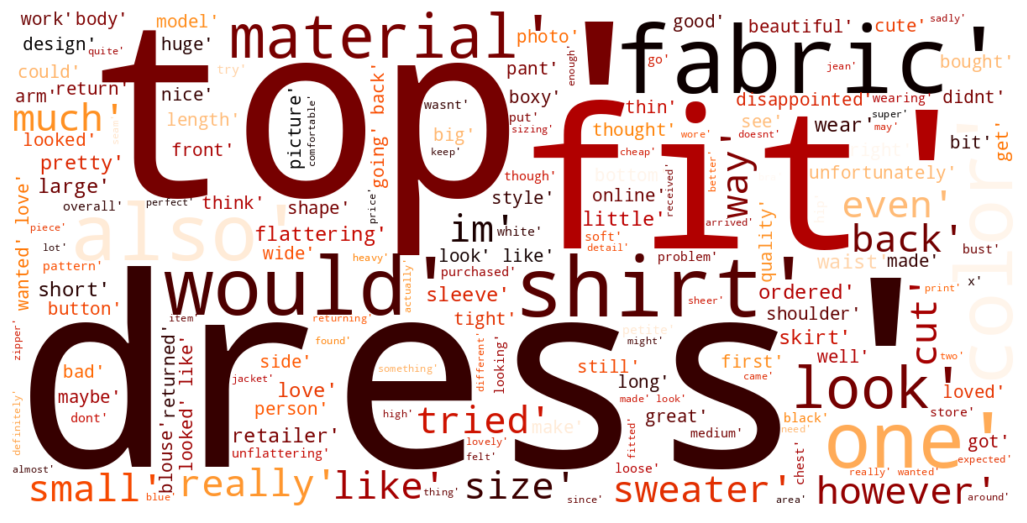

In [ ]:
plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative,
           interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**
**For BERT model, use TF tensor.**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting,
- Deep Learning Model,
- BERT Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df_ml["text"].values
y = df_ml["label"].map({0:1, 1:0}).values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [33]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [34]:
(X_train_count.toarray())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

aa  ab  abbey  abby  abdomen  ability  able  abnormally  abo  abou  \
0       0   0      0     0        0        0     0           0    0     0   
1       0   0      0     0        0        0     0           0    0     0   
2       0   0      0     0        0        0     0           0    0     0   
3       0   0      0     0        0        0     0           0    0     0   
4       0   0      0     0        0        0     0           0    0     0   
...    ..  ..    ...   ...      ...      ...   ...         ...  ...   ...   
18107   0   0      0     0        0        0     0           0    0     0   
18108   0   0      0     0        0        0     0           0    0     0   
18109   0   0      0     0        0        0     0           0    0     0   
18110   0   0      0     0        0        0     0           0    0     0   
18111   0   0      0     0        0        0     0           0    0     0   

       abroad  absolute  absolutely  absolutley  absolutly  abstract  absurd  \
0           0         0           0           0          0         0       0   
1           0         0           0           0          0         0       0   
2           0         0           0           0          0         0       0   
3           0         0           1           0          0         0       0   
4           0         0           0           0          0         0       0   
...       ...       ...         ...         ...        ...       ...     ...   
18107       0         0           0           0          0         0       0   
18108       0         0           0           0          0         0       0   
18109       0         0           0           0          0         0       0   
18110       0         0           1           0          0         0       0   
18111       0         0           0           0          0         0       0   

       abt  abundance  ac  accent  accented  accenting  accentuate  \
0        0          0   0       0         0          0           0   
1        0          0   0       0         0          0           0   
2        0          0   0       0         0          0           0   
3        0          0   0       0         0          0           0   
4        0          0   0       0         0          0           0   
...    ...        ...  ..     ...       ...        ...         ...   
18107    0          0   0       0         0          0           0   
18108    0          0   0       0         0          0           0   
18109    0          0   0       0         0          0           0   
18110    0          0   0       0         0          0           0   
18111    0          0   0       0         0          0           0   

       accentuated  accentuates  accentuating  accept  acceptable  accepted  \
0                0            0             0       0           0         0   
1                0            0             0       0           0         0   
2                0            0             0       0           0         0   
3                0            0             0       0           0         0   
4                0            0             0       0           0         0   
...            ...          ...           ...     ...         ...       ...   
18107            0            0             0       0           0         0   
18108            0            0             0       0           0         0   
18109            0            0             0       0           0         0   
18110            0            0             0       0           0         0   
18111            0            0             0       0           0         0   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0           0            0             0              0          0         0   
1           0            0             0              0          0         0   
2           0            0             0              0          0         0   
3          

### TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [39]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29292217],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
pd.DataFrame(X_train_tf_idf.toarray(),
             columns = tf_idf_vectorizer.get_feature_names_out())

aa    ab  abbey  abby  abdomen  ability  able  abnormally   abo  \
0     0.000 0.000  0.000 0.000    0.000    0.000 0.000       0.000 0.000   
1     0.000 0.000  0.000 0.000    0.000    0.000 0.000       0.000 0.000   
2     0.000 0.000  0.000 0.000    0.000    0.000 0.000       0.000 0.000   
3     0.000 0.000  0.000 0.000    0.000    0.000 0.000       0.000 0.000   
4     0.000 0.000  0.000 0.000    0.000    0.000 0.000       0.000 0.000   
...     ...   ...    ...   ...      ...      ...   ...         ...   ...   
18107 0.000 0.000  0.000 0.000    0.000    0.000 0.000       0.000 0.000   
18108 0.000 0.000  0.000 0.000    0.000    0.000 0.000       0.000 0.000   
18109 0.000 0.000  0.000 0.000    0.000    0.000 0.000       0.000 0.000   
18110 0.000 0.000  0.000 0.000    0.000    0.000 0.000       0.000 0.000   
18111 0.000 0.000  0.000 0.000    0.000    0.000 0.000       0.000 0.000   

       abou  abroad  absolute  absolutely  absolutley  absolutly  abstract  \
0     0.000   0.000     0.000       0.000       0.000      0.000     0.000   
1     0.000   0.000     0.000       0.000       0.000      0.000     0.000   
2     0.000   0.000     0.000       0.000       0.000      0.000     0.000   
3     0.000   0.000     0.000       0.154       0.000      0.000     0.000   
4     0.000   0.000     0.000       0.000       0.000      0.000     0.000   
...     ...     ...       ...         ...         ...        ...       ...   
18107 0.000   0.000     0.000       0.000       0.000      0.000     0.000   
18108 0.000   0.000     0.000       0.000       0.000      0.000     0.000   
18109 0.000   0.000     0.000       0.000       0.000      0.000     0.000   
18110 0.000   0.000     0.000       0.324       0.000      0.000     0.000   
18111 0.000   0.000     0.000       0.000       0.000      0.000     0.000   

       absurd   abt  abundance    ac  accent  accented  accenting  accentuate  \
0       0.000 0.000      0.000 0.000   0.000     0.000      0.000       0.000   
1       0.000 0.000      0.000 0.000   0.000     0.000      0.000       0.000   
2       0.000 0.000      0.000 0.000   0.000     0.000      0.000       0.000   
3       0.000 0.000      0.000 0.000   0.000     0.000      0.000       0.000   
4       0.000 0.000      0.000 0.000   0.000     0.000      0.000       0.000   
...       ...   ...        ...   ...     ...       ...        ...         ...   
18107   0.000 0.000      0.000 0.000   0.000     0.000      0.000       0.000   
18108   0.000 0.000      0.000 0.000   0.000     0.000      0.000       0.000   
18109   0.000 0.000      0.000 0.000   0.000     0.000      0.000       0.000   
18110   0.000 0.000      0.000 0.000   0.000     0.000      0.000       0.000   
18111   0.000 0.000      0.000 0.000   0.000     0.000      0.000       0.000   

       accentuated  accentuates  accentuating  accept  acceptable  accepted  \
0            0.000        0.000         0.000   0.000       0.000     0.000   
1            0.000        0.000         0.000   0.000       0.000     0.000   
2            0.000        0.000         0.000   0.000       0.000     0.000   
3            0.000        0.000         0.000   0.000       0.000     0.000   
4            0.000        0.000         0.000   0.000       0.000     0.000   
...            ...          ...           ...     ...         ...       ...   
18107        0.000        0.000         0.000   0.000       0.000     0.000   
18108        0.000        0.000         0.000   0.000       0.000     0.000   
18109        0.000        0.000         0.000   0.000       0.000     0.000   
18110        0.000        0.000         0.000   0.000       0.000     0.000   
18111        0.000        0.000         0.000   0.000       0.000     0.000   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0       0.000        0.000         0.000          0.000      0.000     0.000   
1       0.000        0.000         0.000          0.000      0.000     0.000 

## Eval functions

In [41]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,RocCurveDisplay, roc_auc_score, roc_curve,precision_recall_curve,average_precision_score,recall_score

In [43]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))


## Logistic Regression

### CountVectorizer

In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
logreg.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [45]:
print("logreg Model")
eval(logreg, X_train_count, X_test_count)

logreg Model
[[3206  503]
 [ 120  700]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.93      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



In [46]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

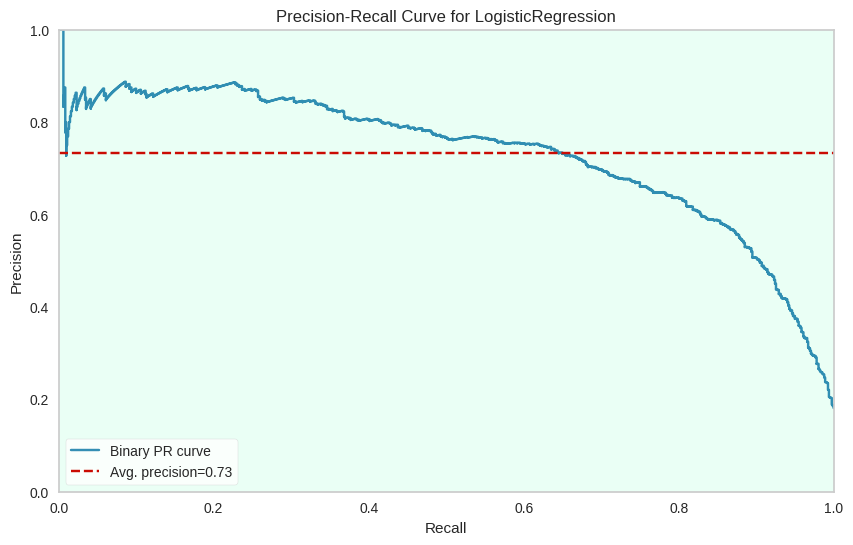

In [47]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000, class_weight="balanced", random_state=101),
    classes=logreg.classes_,
    per_class=True,
    cmap="Set1",
    line_color="orange"
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')
ax.set_title("Custom Precision-Recall Curve")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [48]:
y_pred = logreg.predict(X_test_tf_idf)
log_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log__f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_AP = viz.score_

In [49]:
print("viz.score_       : ", viz.score_)
print("Log_Recall : ", log_rec)
print("Log_F1  : ", log__f1)
print("log_AP : ", log_AP)

viz.score_       :  0.7320997676174644
Log_Recall :  [0.7724454  0.91829268]
Log_F1  :  [0.86282186 0.62308647]
log_AP :  0.7320997676174644


In [50]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [51]:
c_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }


for i, j in c_scorer.items():
    model = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-0":
        log_count_rec = scores
    elif i == "f1-0":
        log_count_f1 = scores
    print(f" {i:20}  {scores}\n")

 accuracy              0.863461425943736

 precision-0           0.9574400166987893

 recall-0              0.8720249530619256

 f1-0                  0.9127249390190058

 precision-1           0.5879803458007486

 recall-1              0.8247535028541775

 f1-1                  0.686436763427207



In [52]:
LogReg_Count = viz.score_
LogReg_Count

0.7320997676174644

### TF-IDF

In [53]:
log_tf_idf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
log_tf_idf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [54]:
print("log_tf_idf Model")
eval(log_tf_idf, X_train_tf_idf, X_test_tf_idf)

log_tf_idf Model
[[3198  511]
 [ 110  710]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.87      0.70       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.93      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



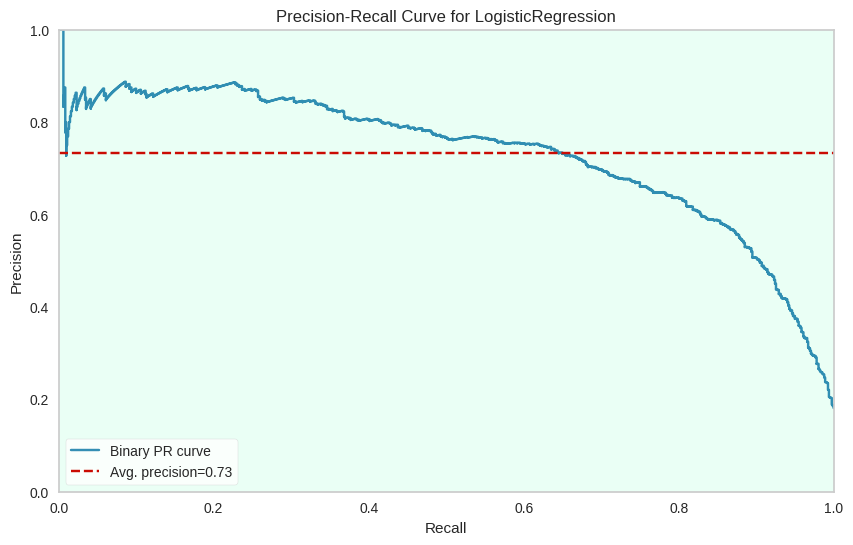

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000, class_weight="balanced", random_state=101),
    classes=log_tf_idf.classes_,
    per_class=True,
    cmap="Set1",
    line_color="orange"
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')
ax.set_title("Custom Precision-Recall Curve")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [55]:
y_pred = log_tf_idf.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_AP = viz.score_

In [ ]:
print("viz.score_       : ", viz.score_)
print("TF_IDF_Recall : ", log_tf_idf_rec)
print("TF_IDF_F1  : ", log_tf_idf_f1)
print("TF_IDF_AP : ", log_tf_idf_AP)

viz.score_       :  0.7320997676174644
TF_IDF_Recall :  [0.86222702 0.86585366]
TF_IDF_F1  :  [0.91150064 0.69573738]
TF_IDF_AP :  0.7320997676174644


Cross Validation

In [56]:
c_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in c_scorer.items():
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20}  : {scores}\n")

 accuracy              : 0.846621059919574

 precision-0           : 0.9638478676346521

 recall-0              : 0.8443796086100696

 f1-0                  : 0.9001545408707825

 precision-1           : 0.5491821422405588

 recall-1              : 0.8567508710801393

 f1-1                  : 0.6692664115231374



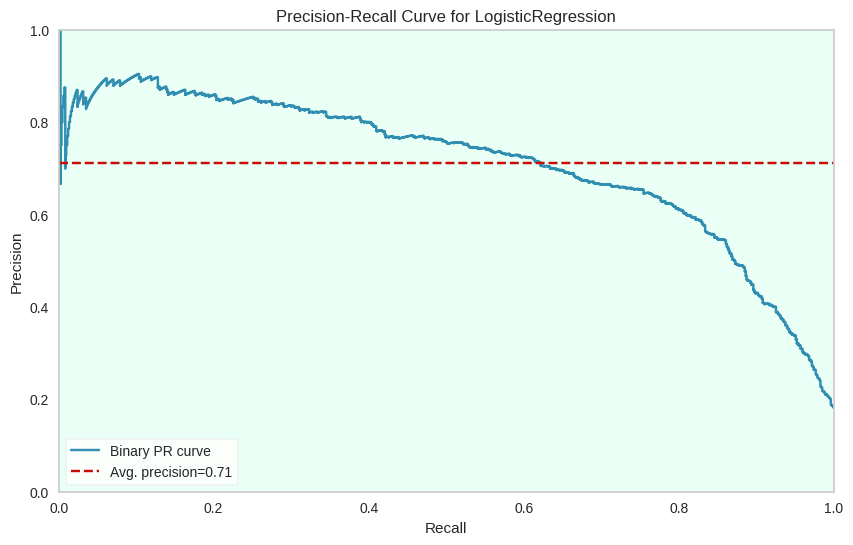

In [57]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced"),
    classes = log_tf_idf.classes_,
    per_class = True,
    cmap="Set1",
    line_color="orange"
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')
ax.set_title("Custom Precision-Recall Curve")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

## Naive Bayes

### Countvectorizer (MultinomialNB)

In [58]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
naive_p = MultinomialNB()
naive_p.fit(X_train_count,y_train)

MultinomialNB()

In [59]:
print("Naive Bayes Model")
eval(naive_p, X_train_count, X_test_count)

Naive Bayes Model
[[3384  325]
 [ 199  621]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3709
           1       0.66      0.76      0.70       820

    accuracy                           0.88      4529
   macro avg       0.80      0.83      0.82      4529
weighted avg       0.89      0.88      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     14831
           1       0.71      0.80      0.75      3281

    accuracy                           0.91     18112
   macro avg       0.83      0.86      0.85     18112
weighted avg       0.91      0.91      0.91     18112



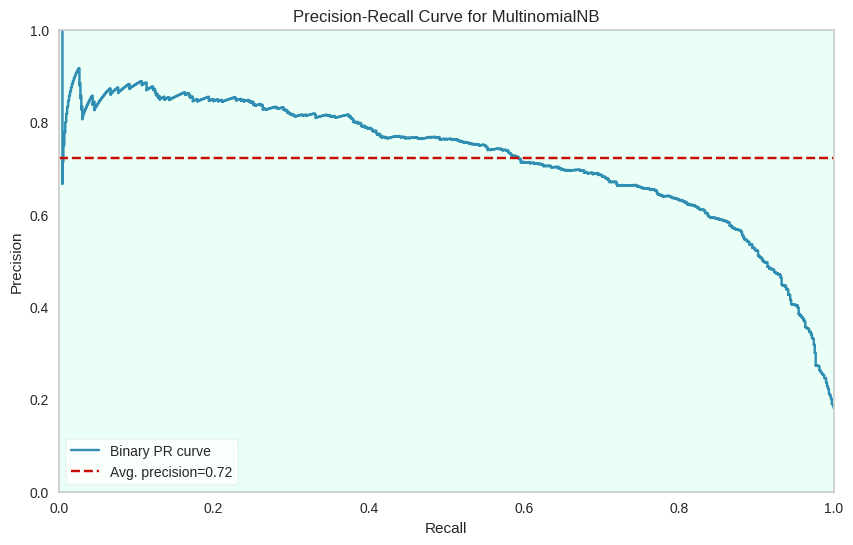

In [ ]:
viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = naive_p.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [60]:
y_pred = naive_p.predict(X_test_count)
nb_multi_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_AP = viz.score_

In [ ]:
print("viz.score_         : ", viz.score_)
print("nb_multi_rec : ", nb_multi_rec)
print("nb_multi_f1  : ", nb_multi_f1)
print("nb_multi_AP  : ", nb_multi_AP)

viz.score_         :  0.7222257634152461
nb_multi_rec :  [0.9123753  0.75731707]
nb_multi_f1  :  [0.92814043 0.70328426]
nb_multi_AP  :  0.7222257634152461


 Cross Validation  

In [61]:
c_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in c_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbm_rec = scores
    elif i == "f1-1":
        nbm_f1 = scores
    print(f" {i:20}  {scores}\n")

 accuracy              0.8819018068390008

 precision-0           0.9381604522428478

 recall-0              0.9161890463891762

 f1-0                  0.9270328258225273

 precision-1           0.6575366320588933

 recall-1              0.7269098895396249

 f1-1                  0.6903423400735845



# BernoulliNB

In [62]:
berlliNB_c = BernoulliNB()
berlliNB_c.fit(X_train_count,y_train)

BernoulliNB()

In [63]:
print("BernoulliNB Model")
eval(berlliNB_c, X_train_count, X_test_count)

BernoulliNB Model
[[3398  311]
 [ 240  580]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3709
           1       0.65      0.71      0.68       820

    accuracy                           0.88      4529
   macro avg       0.79      0.81      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     14831
           1       0.70      0.77      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.85      0.84     18112
weighted avg       0.90      0.90      0.90     18112



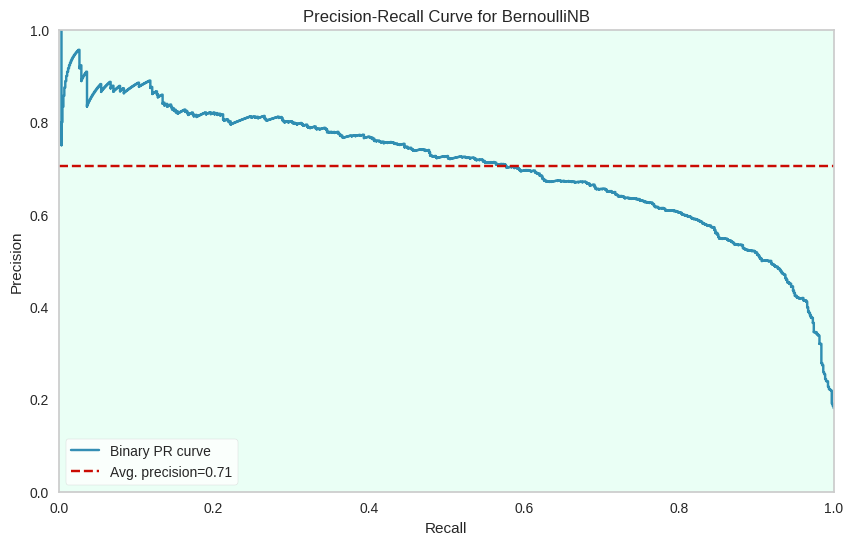

In [ ]:
viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = berlliNB_c.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [64]:
y_pred = berlliNB_c.predict(X_test_count)
berlliNB_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
berlliNB_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
berlliNB_AP = viz.score_

In [ ]:
print("viz.score_        : ", viz.score_)
print("berlliNB_rec : ", berlliNB_rec)
print("berlliNB_f1  : ", berlliNB_f1)
print("berlliNB_AP  : ", berlliNB_AP)

viz.score_        :  0.7053955978736113
berlliNB_rec :  [0.91614991 0.70731707]
berlliNB_f1  :  [0.9250034 0.6779661]
berlliNB_AP  :  0.7053955978736113


 Cross Validation (BernoulliNB )

In [65]:
c_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in c_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbb_rec = scores
    elif i == "f1-1":
        nbb_f1 = scores
    print(f" {i:10}  {scores}\n")

 accuracy    0.8751105276437956

 precision-0  0.9317310833476281

 recall-0    0.9145034106213638

 f1-0        0.9230218325592506

 precision-1  0.643720473735488

 recall-1    0.6970438876121283

 f1-1        0.669137011926247



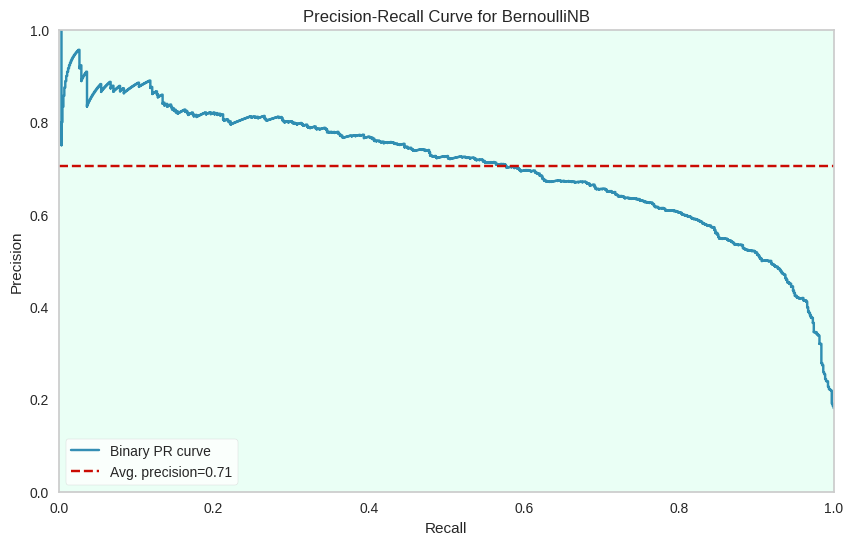

In [ ]:
viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = berlliNB_c.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

### TF-IDF

MultinomialNB

In [66]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [67]:
print("NB_Mult Model")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB_Mult Model
[[3381  328]
 [ 218  602]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3709
           1       0.65      0.73      0.69       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     14831
           1       0.70      0.80      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



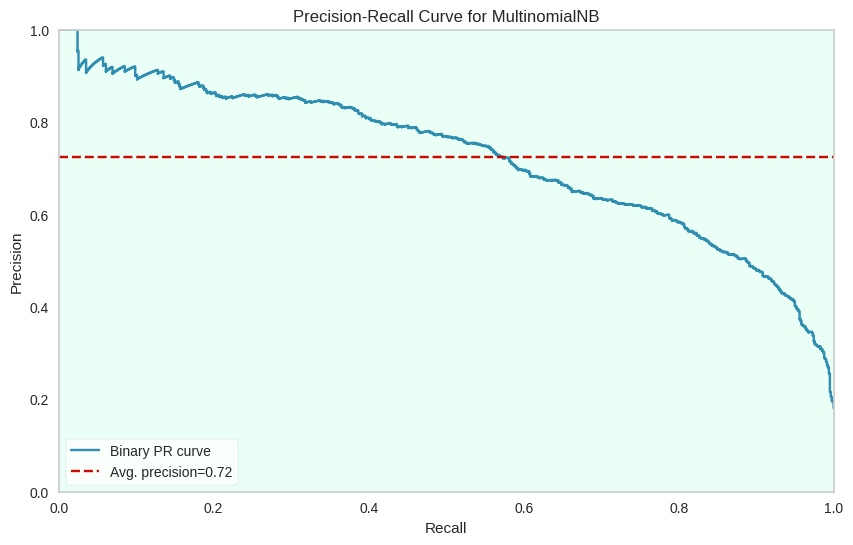

In [ ]:

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nb.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [68]:
y_pred = nb.predict(X_test_tf_idf)
nb_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nbtf_idf_AP = viz.score_

In [ ]:
print("viz.score_        : ", viz.score_)
print("Nb_tf_idf_rec : ", nb_tf_idf_rec)
print("Nb_tf_idf_f1  : ", nb_tf_idf_f1)
print("Nb_tf_idf_AP  : ", nbtf_idf_AP)

viz.score_        :  0.7246482064423603
Nb_tf_idf_rec :  [0.91156646 0.73414634]
Nb_tf_idf_f1  :  [0.92528736 0.688     ]
Nb_tf_idf_AP  :  0.7246482064423603


BernoulliNB

In [69]:
nbb_tfdf_m = BernoulliNB()
nbb_tfdf_m.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [70]:
print("NBBerno_TFIDF Model")
eval(nbb_tfdf_m, X_train_tf_idf, X_test_tf_idf)

NBBerno_TFIDF Model
[[3398  311]
 [ 240  580]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3709
           1       0.65      0.71      0.68       820

    accuracy                           0.88      4529
   macro avg       0.79      0.81      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     14831
           1       0.70      0.77      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.85      0.84     18112
weighted avg       0.90      0.90      0.90     18112



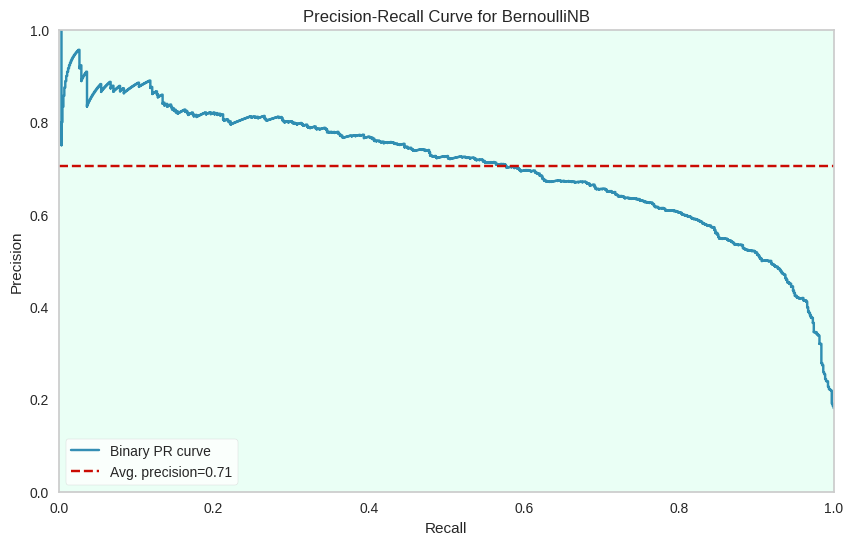

In [ ]:
viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbb_tfdf_m.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [71]:
y_pred = nbb_tfdf_m.predict(X_test_tf_idf)
nb_tfdf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_tfdf_rec_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_tfdf_rec_AP = viz.score_

In [ ]:
print("viz.score_        : ", viz.score_)
print("NB_TFIDF_rec : ", nb_tfdf_rec)
print("NB_TFIDF_f1  : ", nb_tfdf_rec_f1)
print("NB_TFIDF_AP  : ", nb_tfdf_rec_AP)

viz.score_        :  0.7053955978736113
NB_TFIDF_rec :  [0.91614991 0.70731707]
NB_TFIDF_f1  :  [0.9250034 0.6779661]
NB_TFIDF_AP  :  0.7053955978736113


## Support Vector Machine (SVM)

### Countvectorizer

In [72]:
from sklearn.svm import LinearSVC

In [73]:
svc_model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
svc_model.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [74]:
print("SVC MODEL")
eval(svc_model, X_train_count, X_test_count)

SVC MODEL
[[3205  504]
 [ 118  702]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.93      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



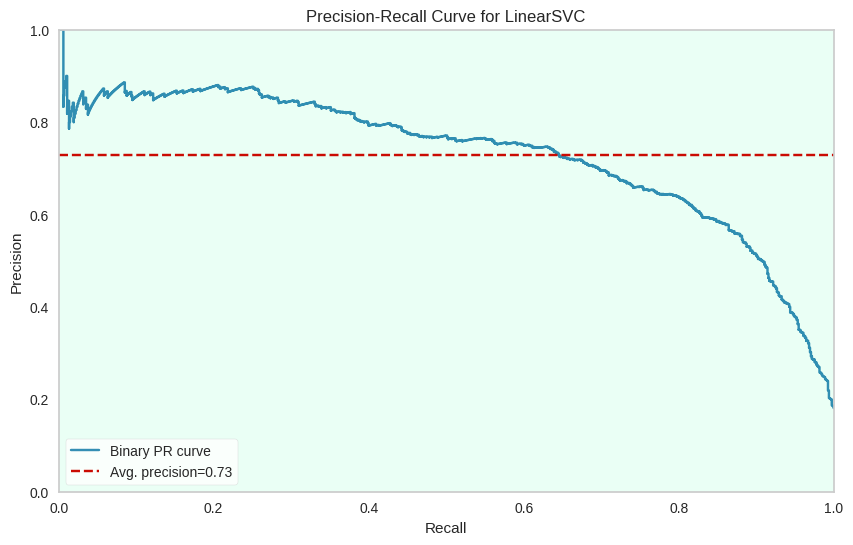

In [ ]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes =svc_model.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [75]:
y_pred = svc_model.predict(X_test_count)
svc_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
svc_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
svc_AP = viz.score_

In [ ]:
print("viz.score_    : ", viz.score_)
print("svc_rec : ", svc_rec)
print("svc_f1  : ", svc_f1)
print("svc_AP  : ", svc_AP)

viz.score_    :  0.7298180388479596
svc_rec :  [0.86411432 0.85609756]
svc_f1  :  [0.91154721 0.69299112]
svc_AP  :  0.7298180388479596


 Cross Validation

In [76]:
c_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in c_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_rec = scores
    elif i == "f1-1":
        svc_f1 = scores
    print(f" {i:20} score for SVC_Count : {scores}\n")

 accuracy             score for SVC_Count : 0.8636272021726438

 precision-0          score for SVC_Count : 0.9574525986792276

 recall-0             score for SVC_Count : 0.8722274274663618

 f1-0                 score for SVC_Count : 0.9128415618184264

 precision-1          score for SVC_Count : 0.588336216778819

 recall-1             score for SVC_Count : 0.8247544295351767

 f1-1                 score for SVC_Count : 0.6866799431825475



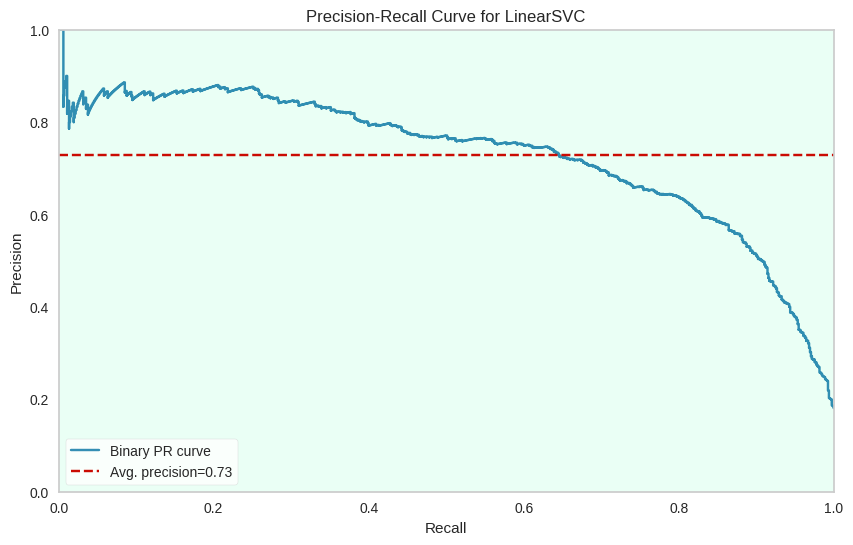

In [ ]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_model.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

### TD-IDF

In [77]:
svc_tfdf_m = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
svc_tfdf_m.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [78]:
print("SVC_TF_IDF Model")
eval(svc_tfdf_m, X_train_tf_idf, X_test_tf_idf)

SVC_TF_IDF Model
[[3110  599]
 [ 110  710]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.54      0.87      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.85      0.78      4529
weighted avg       0.89      0.84      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.56      0.89      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



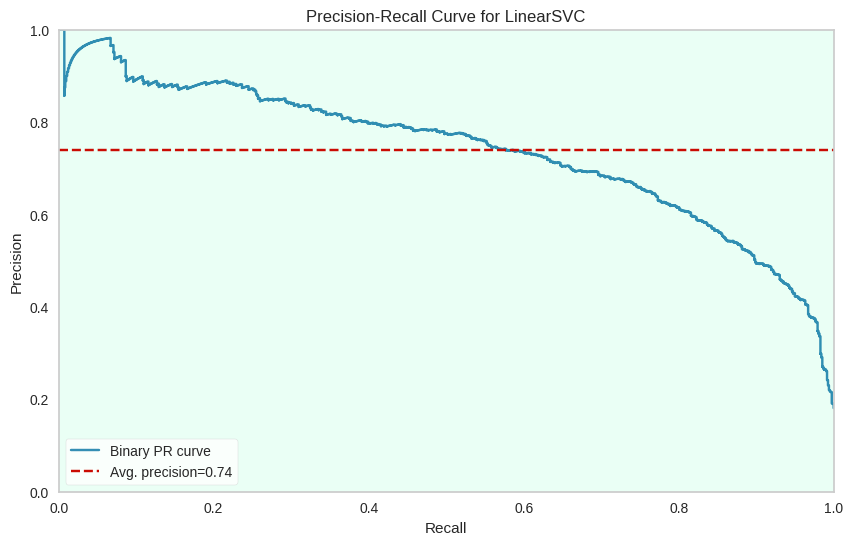

In [ ]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_tfdf_m.classes_,
      per_class = True,
      cmap = "Set1"
)

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [79]:
y_pred = svc_tfdf_m.predict(X_test_tf_idf)
svc_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
svc_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
svc_tf_idf_AP = viz.score_

In [ ]:
print("viz.score_     : ", viz.score_)
print("Svc_tf_idf_rec   : ", svc_tf_idf_rec)
print("Svc_tf_idf_f1   : ", svc_tf_idf_f1)
print("Svc_tf_idf_AP   : ", svc_tf_idf_AP)

viz.score_     :  0.7395260895477577
Svc_tf_idf_rec   :  [0.83850094 0.86585366]
Svc_tf_idf_f1   :  [0.89767643 0.6669798 ]
Svc_tf_idf_AP   :  0.7395260895477577


Cross Validation

In [80]:
c_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in c_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tf_idf_rec = scores
    elif i == "f1-1":
        svc_tf_idf_f1 = scores
    print(f" {i:10} score for SVC_TFIDF : {scores}\n")

 accuracy   score for SVC_TFIDF : 0.8449646994147855

 precision-0 score for SVC_TFIDF : 0.9647604999584635

 recall-0   score for SVC_TFIDF : 0.8414129223745123

 f1-0       score for SVC_TFIDF : 0.8988664017162936

 precision-1 score for SVC_TFIDF : 0.5457199259718333

 recall-1   score for SVC_TFIDF : 0.8610191637630662

 f1-1       score for SVC_TFIDF : 0.6679973173580548



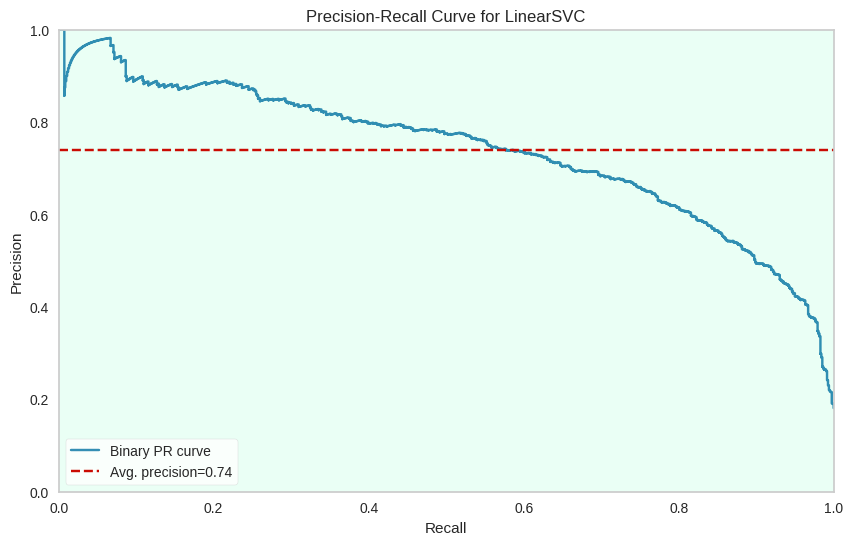

In [ ]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_tfdf_m.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

## Random Forest

### Countvectorizer

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
R_forest_m = RandomForestClassifier(200, max_depth = 10, random_state = 101, class_weight = "balanced",  n_jobs = -1)
R_forest_m.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=101)

In [83]:
print("Random Forest Model")
eval(R_forest_m, X_train_count, X_test_count)

Random Forest Model
[[3157  552]
 [ 159  661]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3709
           1       0.54      0.81      0.65       820

    accuracy                           0.84      4529
   macro avg       0.75      0.83      0.77      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14831
           1       0.61      0.88      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.90      0.87      0.88     18112



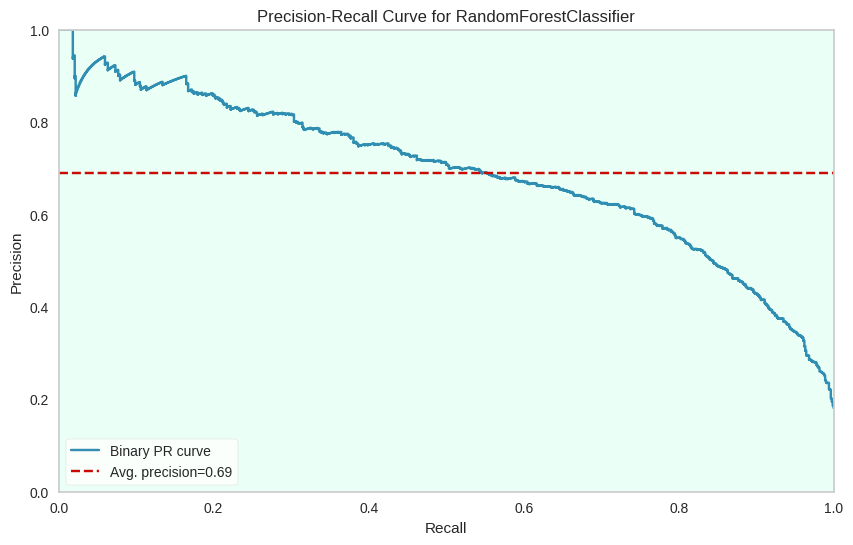

In [ ]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(200, max_depth = 10, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = R_forest_m.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [84]:
y_pred = R_forest_m.predict(X_test_count)
rf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
rf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
rf_AP = viz.score_

In [ ]:
print("viz.score_   : ", viz.score_)
print("RF_rec : ", rf_rec)
print("RF_F1  : ", rf_f1)
print("RF_AP  : ", rf_AP)

viz.score_   :  0.6905415188797268
RF_rec :  [0.85117282 0.80609756]
RF_F1  :  [0.89879004 0.65027054]
RF_AP  :  0.6905415188797268


#Cross Validation

In [85]:
c_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in c_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_rec = scores
    elif i == "f1-1":
        rf_f1 = scores
    print(f" {i:20}  {scores}\n")

 accuracy              0.8430879235674069

 precision-0           0.95091100772772

 recall-0              0.8524033839034665

 f1-0                  0.8989443917553818

 precision-1           0.545741747053738

 recall-1              0.8009822818592927

 f1-1                  0.6490575880280837



### TF-IDF

In [86]:
rf_tfdf_m = RandomForestClassifier(200, max_depth =10, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_tfdf_m.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=101)

In [87]:
print("RF TF_IDF MODEL")
eval(rf_tfdf_m, X_train_tf_idf, X_test_tf_idf)

RF TF_IDF MODEL
[[3124  585]
 [ 172  648]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3709
           1       0.53      0.79      0.63       820

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     14831
           1       0.59      0.90      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.78      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112



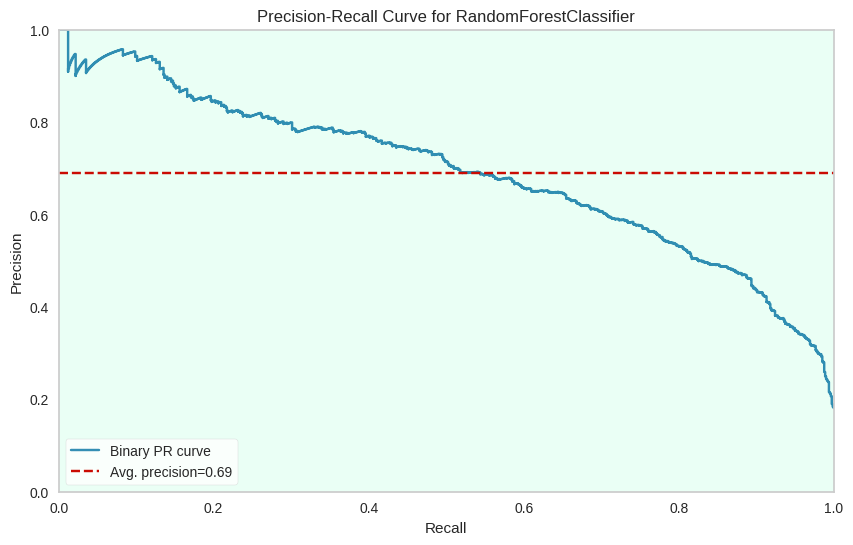

In [ ]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_tfdf_m.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [88]:
y_pred = rf_tfdf_m.predict(X_test_tf_idf)
RF_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
RF_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
RF_tf_idf_AP = viz.score_

In [ ]:
print("viz.score_   : ", viz.score_)
print("TF_IDF_rec : ", RF_tf_idf_rec)
print("TF_IDF_f1  : ", RF_tf_idf_f1)
print("TF_IDFAP  : ", RF_tf_idf_AP)

viz.score_   :  0.690915814422776
TF_IDF_rec :  [0.84227555 0.7902439 ]
TF_IDF_f1  :  [0.89193433 0.63127131]
TF_IDFAP  :  0.690915814422776


Cross Validation (*TF_IDF*)

In [89]:
c_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in c_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        RF_tf_idf_rec = scores
    elif i == "f1-1":
       RF_tf_idf_f1 = scores
    print(f" {i:20} {scores}\n")

 accuracy             0.8350266582803398

 precision-0          0.9486532903392723

 recall-0             0.8442451103521856

 f1-0                 0.8933831834872731

 precision-1          0.5300781396943284

 recall-1             0.7933575505967825

 f1-1                 0.6354014529562626



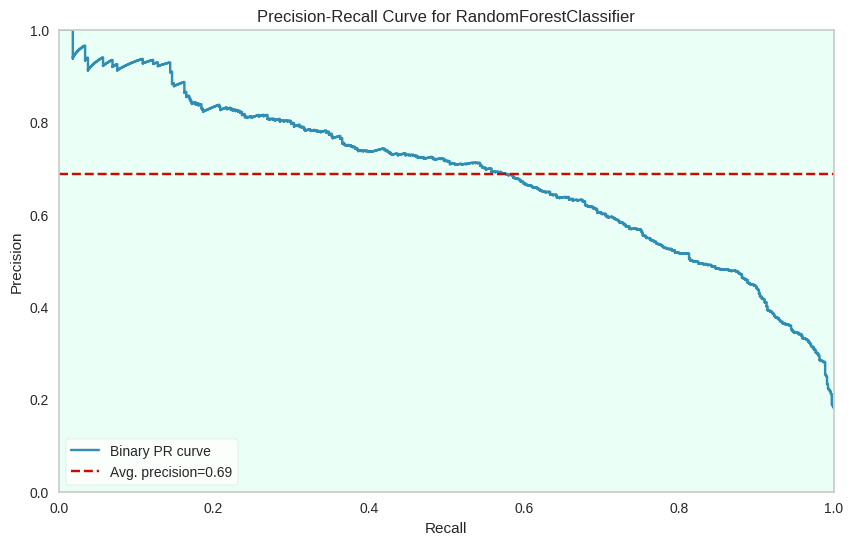

In [ ]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(200, max_depth = 10, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_tfdf_m.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

## Ada Boosting

### Countvectorizer

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
ada_model = AdaBoostClassifier(n_estimators =500, random_state = 42)
ada_model.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [92]:
print("Ada Boosting Model")
eval(ada_model, X_train_count, X_test_count)

Ada Boosting Model
[[3501  208]
 [ 345  475]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3709
           1       0.70      0.58      0.63       820

    accuracy                           0.88      4529
   macro avg       0.80      0.76      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14831
           1       0.81      0.67      0.73      3281

    accuracy                           0.91     18112
   macro avg       0.87      0.81      0.84     18112
weighted avg       0.91      0.91      0.91     18112



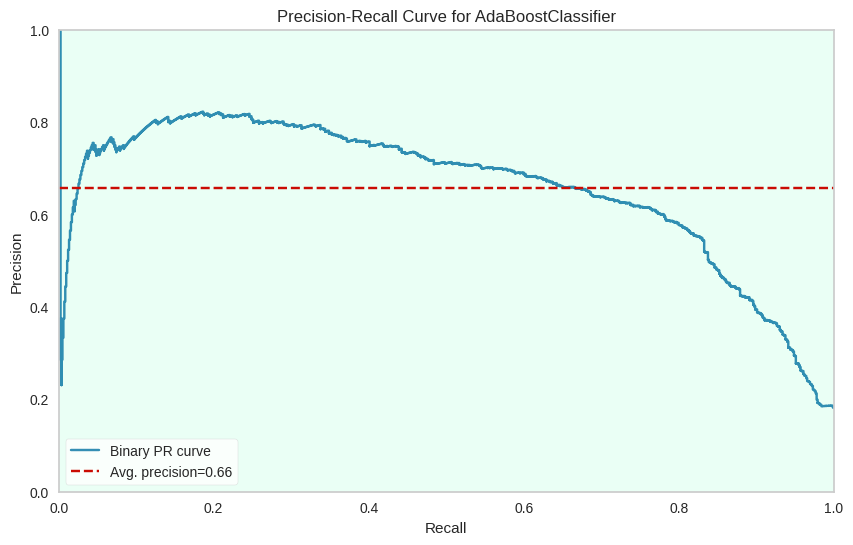

In [ ]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 42),
      classes = ada_model.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [93]:
y_pred = ada_model.predict(X_test_count)
ada_recall = recall_score(y_test, y_pred, pos_label = 1, average = None)
ada_f1 = f1_score(y_test, y_pred, pos_label = 1, average = None)
ada_AP = viz.score_

In [ ]:
print("viz.score_    : ", viz.score_)
print("Ada_Count_rec : ", ada_recall)
print("Ada_Count_f1  : ", ada_f1)
print("Ada_Count_AP  : ", ada_AP)

viz.score_    :  0.6577791226250993
Ada_Count_rec :  [0.94392019 0.57926829]
Ada_Count_f1  :  [0.92680344 0.63206919]
Ada_Count_AP  :  0.6577791226250993


Cross Validation

### TF-IDF

In [95]:
ada_tfdf_m = AdaBoostClassifier(n_estimators = 500, random_state = 101,learning_rate=0.7)
ada_tfdf_m.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=500, random_state=101)

In [96]:
print("Ada TF-IDF Model")
eval(ada_tfdf_m, X_train_tf_idf, X_test_tf_idf)

Ada TF-IDF Model
[[3518  191]
 [ 360  460]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3709
           1       0.71      0.56      0.63       820

    accuracy                           0.88      4529
   macro avg       0.81      0.75      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14831
           1       0.84      0.68      0.75      3281

    accuracy                           0.92     18112
   macro avg       0.89      0.83      0.85     18112
weighted avg       0.92      0.92      0.92     18112



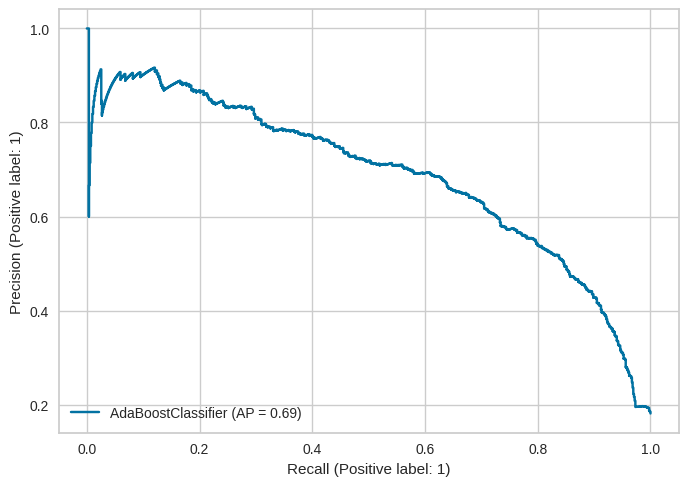

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(ada_tfdf_m,
                                      X_test_tf_idf,
                                      y_test);

In [97]:
y_pred = ada_tfdf_m.predict(X_test_tf_idf)
ada_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 1, average = None)
ada_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 1, average = None)
ada_tf_idf_AP = viz.score_


In [ ]:
print("viz.score_    : ", viz.score_)
print("Ada_TF_IDF_rec : ", ada_tf_idf_rec)
print("Ada_TF_IDF_f1  : ", ada_tf_idf_f1)
print("Ada_TF_IDF_AP  : ", ada_tf_idf_AP)

viz.score_    :  0.6573356477991713
Ada_TF_IDF_rec :  [0.94850364 0.56097561]
Ada_TF_IDF_f1  :  [0.92737577 0.62542488]
Ada_TF_IDF_AP  :  0.6573356477991713


## DL modeling

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [99]:
df1 = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")

In [100]:
df_dl = df1[["Review Text","Recommended IND"]]

In [101]:
df_dl.rename(columns = {'Review Text':'text', 'Recommended IND':'label'}, inplace = True)

In [ ]:
df_dl.head()

text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   label  
0      1  
1      1  
2      0  
3      1  
4      1

In [102]:
df_dl = df_dl.dropna(subset = ['text'], axis = 0)
df_dl = df_dl.reset_index(drop = True)

In [103]:
df_dl.isnull().sum()

text     0
label    0
dtype: int64

In [104]:
x_dl = df_ml["text"].values
y_dl = df_ml["label"].map({0:1, 1:0}).values

In [ ]:
x_dl

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress delivered nordstrom tag found much cheaper looking',
       'dress lovely feminine fit perfectly easy wear comfy hi

### Tokenization

In [105]:
from keras.preprocessing.text import Tokenizer
num_words = 15000
tokenizer = Tokenizer(num_words = num_words)

In [106]:
tokenizer.fit_on_texts(x_dl)

### Creating word index

In [107]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'size': 3,
 'love': 4,
 'top': 5,
 'like': 6,
 'color': 7,
 'look': 8,
 'wear': 9,
 'great': 10,
 'im': 11,
 'would': 12,
 'fabric': 13,
 'small': 14,
 'really': 15,
 'ordered': 16,
 'little': 17,
 'perfect': 18,
 'one': 19,
 'flattering': 20,
 'soft': 21,
 'well': 22,
 'back': 23,
 'comfortable': 24,
 'cute': 25,
 'nice': 26,
 'bought': 27,
 'beautiful': 28,
 'bit': 29,
 'material': 30,
 'shirt': 31,
 'large': 32,
 'much': 33,
 'sweater': 34,
 'length': 35,
 'run': 36,
 'jean': 37,
 'also': 38,
 'work': 39,
 'petite': 40,
 'got': 41,
 'long': 42,
 'short': 43,
 'waist': 44,
 'quality': 45,
 'medium': 46,
 'skirt': 47,
 'think': 48,
 'pretty': 49,
 'even': 50,
 'retailer': 51,
 'x': 52,
 'make': 53,
 'feel': 54,
 'tried': 55,
 'pant': 56,
 'store': 57,
 'usually': 58,
 'get': 59,
 'way': 60,
 'sleeve': 61,
 'good': 62,
 'could': 63,
 'big': 64,
 'made': 65,
 'cut': 66,
 'go': 67,
 'dont': 68,
 'didnt': 69,
 'still': 70,
 'style': 71,
 'right': 72,
 'black': 73,

### Converting tokens to numeric

In [108]:
X_num_tokens = tokenizer.texts_to_sequences(x_dl)

### Maximum number of tokens for all documents¶

In [109]:
#storing length of each token
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [110]:
num_tokens.mean()

28.100878936442736

In [111]:
num_tokens.max()

58

In [ ]:
num_tokens.sum()

636232

### Fixing token counts of all documents (pad_sequences)

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [113]:
max_tokens = 58
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [ ]:
X_pad.shape

(22641, 58)

### Train Set Split

In [114]:
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.2, stratify = y, random_state = 42)

### Modeling

In [116]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 5, restore_best_weights = True)

In [117]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=num_words, output_dim=58, input_length=max_tokens))

lstm_model.add(Dropout(0.4))

lstm_model.add(tf.keras.layers.LSTM(units=58, return_sequences=True))
lstm_model.add(Dropout(0.40))
lstm_model.add(tf.keras.layers.LSTM(units=24, return_sequences=False))

lstm_model.add(Dense(1, activation='sigmoid'))

In [118]:
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.003), metrics=['Recall'])
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 58)            870000    
                                                                 
 dropout (Dropout)           (None, 58, 58)            0         
                                                                 
 lstm (LSTM)                 (None, 58, 58)            27144     
                                                                 
 dropout_1 (Dropout)         (None, 58, 58)            0         
                                                                 
 lstm_1 (LSTM)               (None, 24)                7968      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 905,137
Trainable params: 905,137
Non-trai

In [119]:
from sklearn.utils import class_weight

In [120]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61061291, 2.76013411])

In [121]:
lstm_model.fit(X_train, y_train, epochs=30, batch_size=200,sample_weight=classes_weights,
               validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/30
91/91 [==============================] - 16s 108ms/step - loss: 0.4494 - recall: 0.7510 - val_loss: 0.4021 - val_recall: 0.9049
Epoch 2/30
91/91 [==============================] - 9s 98ms/step - loss: 0.2939 - recall: 0.9043 - val_loss: 0.2973 - val_recall: 0.8024
Epoch 3/30
91/91 [==============================] - 9s 98ms/step - loss: 0.2425 - recall: 0.9302 - val_loss: 0.3203 - val_recall: 0.7902
Epoch 4/30
91/91 [==============================] - 9s 96ms/step - loss: 0.2025 - recall: 0.9461 - val_loss: 0.3000 - val_recall: 0.7744
Epoch 5/30
91/91 [==============================] - 9s 97ms/step - loss: 0.1684 - recall: 0.9592 - val_loss: 0.3980 - val_recall: 0.8085
Epoch 6/30
91/91 [==============================] - 9s 96ms/step - loss: 0.1469 - recall: 0.9653 - val_loss: 0.3825 - val_recall: 0.6793
Epoch 7/30
91/91 [==============================] - 9s 97ms/step - loss: 0.1402 - recall: 0.9683 - val_loss: 0.3549 - val_recall: 0.7354
Epoch 7: early stopping


# Model Evaluation

In [122]:
lstm_model_loss = pd.DataFrame(lstm_model.history.history)
lstm_model_loss.head()

loss  recall  val_loss  val_recall
0 0.449   0.751     0.402       0.905
1 0.294   0.904     0.297       0.802
2 0.243   0.930     0.320       0.790
3 0.203   0.946     0.300       0.774
4 0.168   0.959     0.398       0.809

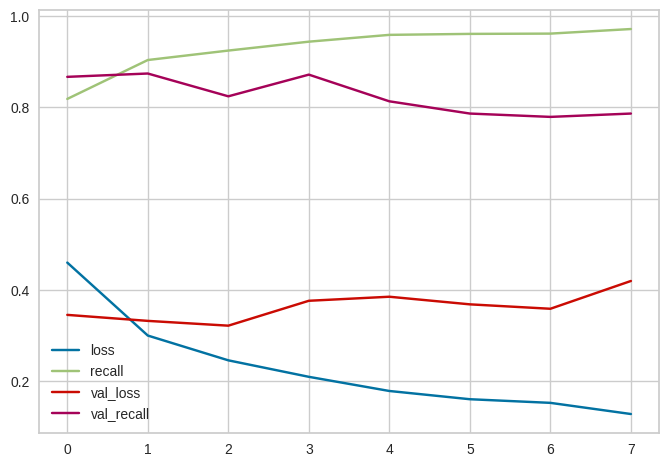

In [ ]:
lstm_model_loss.plot();

In [123]:
lstm_model.evaluate(X_test, y_test)

142/142 [==============================] - 2s 15ms/step - loss: 0.2973 - recall: 0.8024


[0.2972908020019531, 0.8024390339851379]

In [124]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (lstm_model.predict(X_train) >= 0.4)

print(confusion_matrix(y_train, y_train_pred))
print("---------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 7s 11ms/step
[[13111  1720]
 [  138  3143]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     14831
           1       0.65      0.96      0.77      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.92      0.85     18112
weighted avg       0.93      0.90      0.90     18112



In [125]:
y_pred = (lstm_model.predict(X_test) >= 0.4)

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 2s 12ms/step
[[3187  522]
 [ 126  694]]
--------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.57      0.85      0.68       820

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.79      4529
weighted avg       0.89      0.86      0.87      4529



142/142 [==============================] - 2s 11ms/step


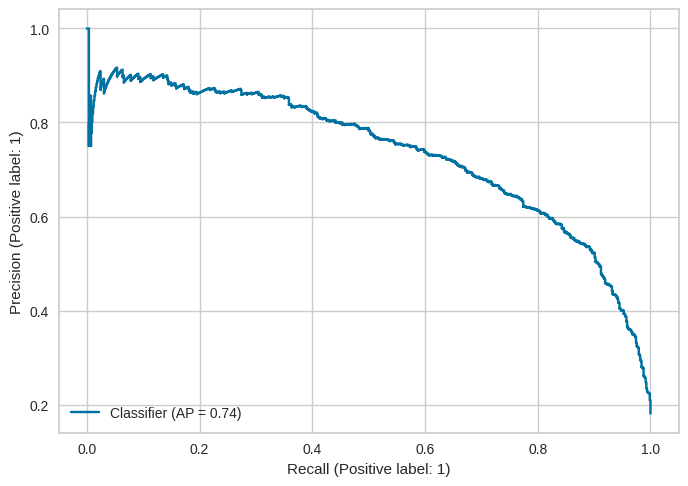

In [127]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = lstm_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [128]:
lstm_AP = average_precision_score(y_test, y_pred_proba)
lstm_f1 = f1_score(y_test, y_pred)
lstm1_rec = recall_score(y_test, y_pred)

In [ ]:
print("LSTM_AP   : ", lstm_AP)
print("LSTM_f1   : ", lstm_f1)
print("LSTM_rec  : ", lstm1_rec)

LSTM_AP   :  0.7095410273887856
LSTM_f1   :  0.6907317073170731
LSTM_rec  :  0.8634146341463415


In [129]:
Gru_model = Sequential()

Gru_model.add(Embedding(input_dim=num_words, output_dim=58, input_length=max_tokens))

Gru_model.add(Dropout(0.4))

Gru_model.add(GRU(units=58, return_sequences=True))
Gru_model.add(Dropout(0.40))
Gru_model.add(GRU(units=24, return_sequences=False))

#dl_model.add(GRU(units=15, return_sequences=True))

#dl_model.add(GRU(units=7, return_sequences=False))

Gru_model.add(Dense(1, activation='sigmoid'))

In [130]:
Gru_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = 0.003), metrics=['Recall'])
Gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 58, 58)            870000    
                                                                 
 dropout_2 (Dropout)         (None, 58, 58)            0         
                                                                 
 gru (GRU)                   (None, 58, 58)            20532     
                                                                 
 dropout_3 (Dropout)         (None, 58, 58)            0         
                                                                 
 gru_1 (GRU)                 (None, 24)                6048      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 896,605
Trainable params: 896,605
Non-tr

In [131]:
Gru_model.fit(X_train, y_train, epochs=30, batch_size=200,sample_weight=classes_weights,
               validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/30
91/91 [==============================] - 27s 100ms/step - loss: 0.4570 - recall: 0.7534 - val_loss: 0.2935 - val_recall: 0.8037
Epoch 2/30
91/91 [==============================] - 8s 84ms/step - loss: 0.2998 - recall: 0.9049 - val_loss: 0.3391 - val_recall: 0.8720
Epoch 3/30
91/91 [==============================] - 8s 85ms/step - loss: 0.2424 - recall: 0.9326 - val_loss: 0.3517 - val_recall: 0.8695
Epoch 4/30
91/91 [==============================] - 8s 85ms/step - loss: 0.2036 - recall: 0.9479 - val_loss: 0.3252 - val_recall: 0.7720
Epoch 5/30
91/91 [==============================] - 8s 83ms/step - loss: 0.1811 - recall: 0.9549 - val_loss: 0.3984 - val_recall: 0.8305
Epoch 6/30
91/91 [==============================] - 8s 84ms/step - loss: 0.1538 - recall: 0.9668 - val_loss: 0.3686 - val_recall: 0.7159
Epoch 6: early stopping


# GRU Model Evaluation

In [132]:
Gru_model_loss = pd.DataFrame(Gru_model.history.history)

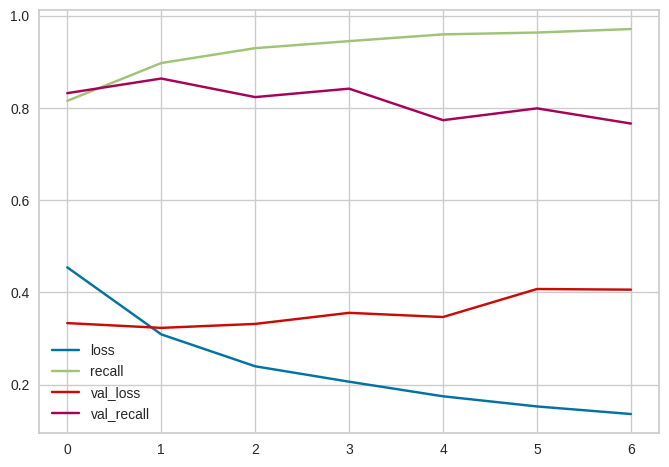

In [ ]:
Gru_model_loss.plot();

In [133]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = Gru_model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("---------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 7s 10ms/step
[[13405  1426]
 [  438  2843]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     14831
           1       0.67      0.87      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.89      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [134]:
y_pred_G = (Gru_model.predict(X_test) >= 0.5)

print(confusion_matrix(y_test, y_pred_G))
print("--------------------------------------")
print(classification_report(y_test, y_pred_G))

142/142 [==============================] - 2s 11ms/step
[[3322  387]
 [ 161  659]]
--------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3709
           1       0.63      0.80      0.71       820

    accuracy                           0.88      4529
   macro avg       0.79      0.85      0.82      4529
weighted avg       0.90      0.88      0.88      4529



142/142 [==============================] - 1s 10ms/step


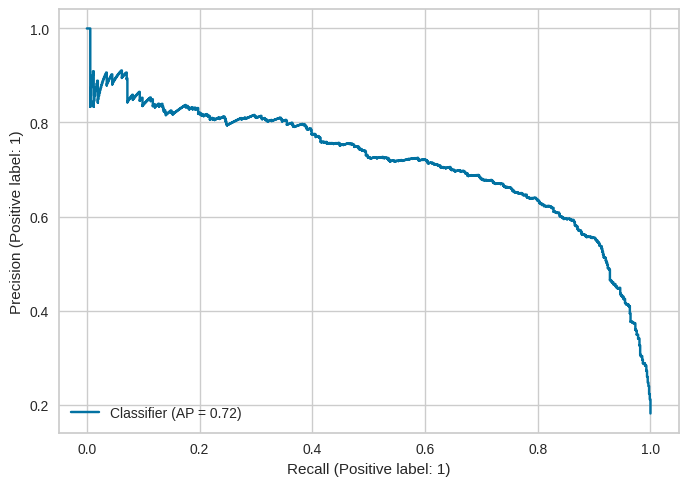

In [135]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba_G = Gru_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_G)

In [136]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba_G)

0.7177345806140607

In [137]:
GRU_AP = average_precision_score(y_test, y_pred_proba_G)
GRU_f1 = f1_score(y_test, y_pred_G)
GRU_rec = recall_score(y_test, y_pred_G)



In [ ]:
print("GRU_AP   : ", GRU_AP)
print("GRU_f1   : ", GRU_f1)
print("GRU_rec  : ", GRU_rec)

GRU_AP   :  0.730465260746438
GRU_f1   :  0.6907317073170731
GRU_rec  :  0.8634146341463415


## BERT Modeling

In [138]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.0 MB/s eta 0:00:00


In [139]:
x_dl

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       ...,
       'fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress delivered nordstrom tag found much cheaper looking',
       'dress lovely feminine fit perfectly easy wear comfy hi

### Tokenization

In [140]:
from transformers import BertTokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [141]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_tokens = []
for sent in x_dl:


    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_tokens))

Max sentence length:  69


In [142]:
np.array(num_of_tokens).mean()

32.7866702000795

In [143]:
sum(np.array(num_of_tokens) <= 69) / len(num_of_tokens)

1.0

In [144]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [145]:
all_sentence_tokens = tokenizer(list(x_dl),
                                max_length=69,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [146]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 4377, ...,    0,    0,    0],
       [ 101, 2152, 3246, ...,    0,    0,    0],
       ...,
       [ 101, 4906, 2092, ...,    0,    0,    0],
       [ 101, 4149, 4377, ...,    0,    0,    0],
       [ 101, 4377, 8403, ...,    0,    0,    0]])

In [147]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [148]:
#Transformation Vectors to Matrices
def transformation(x_dl):
  # set array dimensions
  seq_len = 69

  all_sentence_tokens = tokenizer(list(x_dl),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [149]:
Xids_train, Xmask_train = transformation(X_train_bert)

Xids_test, Xmask_test = transformation(X_test_bert)

In [150]:
Xids_train

array([[  101,  5247,  2051, ...,     0,     0,     0],
       [  101, 15624,  1055, ...,     0,     0,     0],
       [  101,  2718,  5096, ...,     0,     0,     0],
       ...,
       [  101,  4149,  4377, ...,     0,     0,     0],
       [  101,  2307,  4906, ...,     0,     0,     0],
       [  101,  4906,  2327, ...,     0,     0,     0]])

In [151]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)


Xids_train.shape  : (18112, 69)
Xmask_train.shape : (18112, 69)
Xids_test.shape   : (4529, 69)
Xmask_test.shape  : (4529, 69)


In [152]:
labels_train = y_train_bert.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [153]:
labels_test = y_test_bert.reshape(-1,1)
labels_test

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow Tensor

In [154]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(69,), dtype=tf.int64, name=None), TensorSpec(shape=(69,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [155]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(69,), dtype=tf.int64, name=None), TensorSpec(shape=(69,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [156]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [157]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [158]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(69,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(69,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [159]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(69,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(69,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

## Batch Size

In [160]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


In [161]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.4 MB/s eta 0:00:00


In [163]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [164]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1132
113


### Creating Model with TPU

In [165]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(69,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(69,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [166]:
with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  from keras.losses import BinaryCrossentropy
  from keras.metrics import Recall

  #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [167]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 69)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 69)]         0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 69,                                            

In [168]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
566/566 [==============================] - 143s 108ms/step - loss: 0.6423 - recall: 0.7254 - val_loss: 0.5042 - val_recall: 0.7220
Epoch 2/2
566/566 [==============================] - 47s 83ms/step - loss: 0.5510 - recall: 0.7973 - val_loss: 0.4864 - val_recall: 0.7537


## Model evaluation

In [169]:
Bert_model_loss = pd.DataFrame(model3.history.history)
Bert_model_loss.head()

loss  recall  val_loss  val_recall
0 0.642   0.725     0.504       0.722
1 0.551   0.797     0.486       0.754

<Axes: >

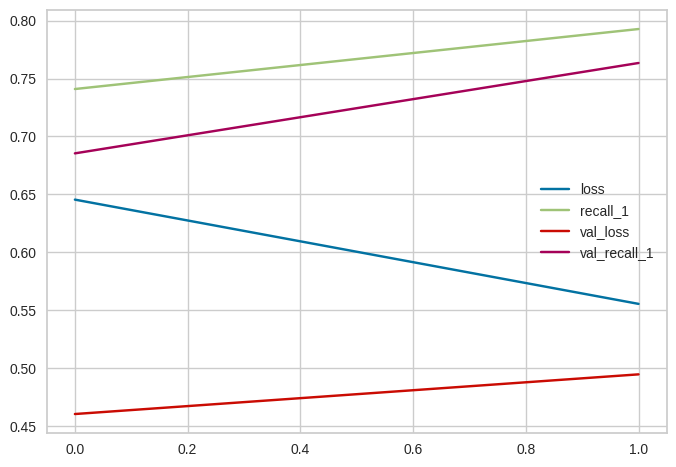

In [ ]:
Bert_model_loss.plot()

In [170]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_bert = model3.predict(val_ds) >= 0.5

print(classification_report(y_test_bert, y_pred_bert))

142/142 [==============================] - 20s 72ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3709
           1       0.68      0.75      0.71       820

    accuracy                           0.89      4529
   macro avg       0.81      0.84      0.82      4529
weighted avg       0.90      0.89      0.89      4529



In [171]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train_bert, y_train_pred))

566/566 [==============================] - 12s 19ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14831
           1       0.75      0.81      0.78      3281

    accuracy                           0.92     18112
   macro avg       0.85      0.87      0.86     18112
weighted avg       0.92      0.92      0.92     18112



In [172]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test_bert, y_pred_proba)

142/142 [==============================] - 5s 27ms/step


0.7635243784353429

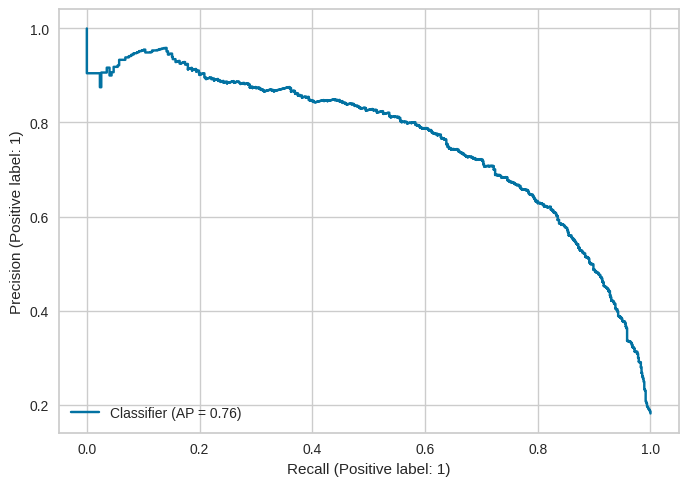

In [ ]:
PrecisionRecallDisplay.from_predictions(y_test_bert, y_pred_proba)

In [173]:
BERT_AP = average_precision_score(y_test_bert, y_pred_proba)
BERT_f1 = f1_score(y_test_bert, y_pred_bert)
BERT_rec = recall_score(y_test_bert, y_pred_bert)

In [174]:
print("BERT_AP   : ", BERT_AP)
print("BERT_f1   : ", BERT_f1)
print("BERT_rec  : ", BERT_rec)

BERT_AP   :  0.7635243784353429
BERT_f1   :  0.7128027681660899
BERT_rec  :  0.7536585365853659


### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [279]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "Lstm DL", "GRU DL", "BERT"],

                        "F1_Score": [nb_multi_f1, log_count_f1, svc_f1, rf_f1, ada_f1, nb_tf_idf_f1,
                                     log_tf_idf_f1, svc_tf_idf_f1, rf_f1, ada_tf_idf_f1, lstm_f1, GRU_f1,
                                     BERT_f1],

                        "Recall_Score": [nb_multi_rec, log_rec, svc_rec, rf_rec, ada_recall, nb_tf_idf_rec,
                                         log_tfidf_rec, svc_tf_idf_rec, rf_rec, ada_tf_idf_rec, lstm_f1, GRU_rec,
                                         BERT_rec],

                        "Average_Precision_Score": [nb_multi_AP, log_AP, svc_AP, rf_AP, ada_AP, nb_tfdf_rec_AP,
                                                    log_tf_idf_AP, svc_tf_idf_AP, rf_f1, ada_tf_idf_AP, lstm_AP, GRU_AP,
                                                    BERT_AP]})

compare = compare.sort_values(by="Recall_Score", ascending=True)
fig = px.bar(compare, x = "Recall_Score", y = "Model", title = "Recall_Score")
fig.show()

compare = compare.sort_values(by="F1_Score", ascending=True)
fig = px.bar(compare, x = "F1_Score", y = "Model", title = "F1_Score")
fig.show()

compare = compare.sort_values(by="Average_Precision_Score", ascending=True)
fig = px.bar(compare, x = "Average_Precision_Score", y = "Model", title = "Average_Precision_Score")
fig.show()

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___